### Importing libraries and the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import mode

In [3]:
df = pd.read_csv("IndianHealthyRecipe.csv")

df.head()

,Dish Name,Description,Spice,Prep Time,Views,Rating,Number of Votes,Serves,Dietary Info,Cook Time,Ingredients,Instructions
0,Pistachio chicken,Mild chicken in a creamy pistachio sauce,mild,Prep 10 mins,11604,4.1,18.0,4.0,['CONTAINS-NUTS'],30 mins,"1) 600g chicken thighs, cut into chunks\n2) 10...","1) Boil enough water to cover the pistachios, ..."
1,Tangy Fried Okra,Bhindi with Amchoor,medium,Prep 10 mins,49899,4.6,35.0,4.0,['VEGETARIAN'],15 mins,1) 500g okra\n2) 3 tbsp mustard oil\n3) 1 onio...,1) Wash and thoroughly dry the okra (kitchen r...
2,Healthy Chicken Korma,Chicken in Creamy Almond Sauce,mild,Prep 10 mins,115569,3.6,163.0,4.0,['CONTAINS-NUTS'],20 mins,1) 6-8 tbsp natural yoghurt\n2) 1 tsp turmeric...,1) Grind your whole spices in a spice grinder....
3,Brown Lentil Dhal,Sabut Masoor di Dhal,medium,Prep 10 mins,146798,3.7,87.0,4.0,['VEGETARIAN'],20 mins,1) 200g brown lentils\n2) Approx. 1L of water\n,1) Place the lentils in the pressure cooker wi...
4,Thari Wala Chicken,Healthy Chicken Curry,medium,Prep 10 mins,262696,3.5,343.0,4.0,['LACTOSE-FREE'],40 mins,1) 8 pieces of chicken (4 legs cut into thigh ...,"1) Skin the chicken, removing any excess fat.\..."


### Data Cleaning and Wrangling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Dish Name        149 non-null    object 
 1   Description      149 non-null    object 
 2   Spice            145 non-null    object 
 3   Prep Time        148 non-null    object 
 4   Views            149 non-null    int64  
 5   Rating           149 non-null    float64
 6   Number of Votes  147 non-null    float64
 7   Serves           146 non-null    float64
 8   Dietary Info     149 non-null    object 
 9   Cook Time        134 non-null    object 
 10  Ingredients      149 non-null    object 
 11  Instructions     149 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 14.1+ KB


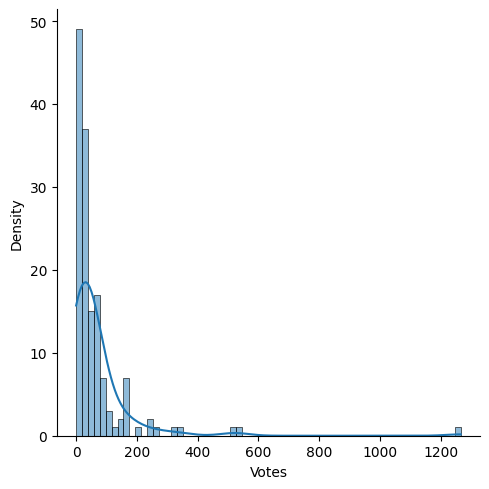

In [5]:
sns.displot(df['Number of Votes'], kde = True)
plt.xlabel("Votes")
plt.ylabel("Density")
plt.show()

In [6]:
df['Number of Votes'] = df['Number of Votes'].fillna(np.mean(df['Number of Votes']))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Dish Name        149 non-null    object 
 1   Description      149 non-null    object 
 2   Spice            145 non-null    object 
 3   Prep Time        148 non-null    object 
 4   Views            149 non-null    int64  
 5   Rating           149 non-null    float64
 6   Number of Votes  149 non-null    float64
 7   Serves           146 non-null    float64
 8   Dietary Info     149 non-null    object 
 9   Cook Time        134 non-null    object 
 10  Ingredients      149 non-null    object 
 11  Instructions     149 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 14.1+ KB


In [7]:
df[['Cook Time']].head()

,Cook Time
0,30 mins
1,15 mins
2,20 mins
3,20 mins
4,40 mins


In [8]:
df['Cook Time'].unique()

array([' 30 mins', ' 15 mins', ' 20 mins', ' 40 mins', ' 10 mins',
       ' 25 mins', ' 5 mins', nan, ' 1 hr', ' 6 mins', ' 50 mins',
       ' 5 hrs', ' 35 mins', ' 1 hr 5 mins'], dtype=object)

In [9]:
def transform_cook_time(time):

  try:
    unit = time.split(" ")[2]
    if unit == 'mins':
      return int(time.split(" ")[1])
    elif time == ' 1 hr 5 mins':
      return 65
    elif time == ' 1 hr':
      return 60
    else:
      return 300
  except:
    return time

In [10]:
df['Cook Time'] = df['Cook Time'].apply(lambda x: transform_cook_time(x))

df['Cook Time'].unique()

array([ 30.,  15.,  20.,  40.,  10.,  25.,   5.,  nan,  60.,   6.,  50.,
       300.,  35.,  65.])

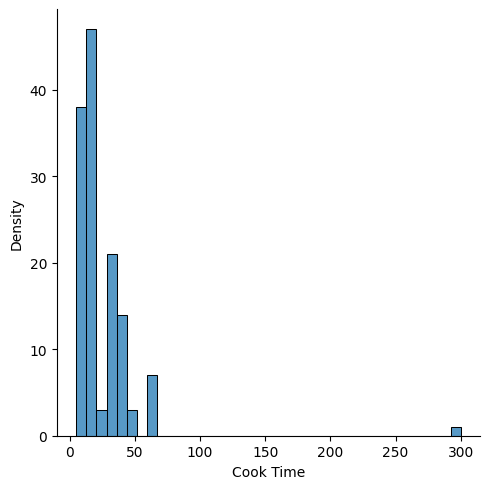

In [11]:
sns.displot(df['Cook Time'])
plt.xlabel("Cook Time")
plt.ylabel("Density")
plt.show()

In [12]:
mode(df['Cook Time'])[0]

20.0

In [13]:
df['Cook Time'] = df['Cook Time'].fillna(20)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Dish Name        149 non-null    object 
 1   Description      149 non-null    object 
 2   Spice            145 non-null    object 
 3   Prep Time        148 non-null    object 
 4   Views            149 non-null    int64  
 5   Rating           149 non-null    float64
 6   Number of Votes  149 non-null    float64
 7   Serves           146 non-null    float64
 8   Dietary Info     149 non-null    object 
 9   Cook Time        149 non-null    float64
 10  Ingredients      149 non-null    object 
 11  Instructions     149 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 14.1+ KB


In [14]:
df[['Prep Time']].head()

,Prep Time
0,Prep 10 mins
1,Prep 10 mins
2,Prep 10 mins
3,Prep 10 mins
4,Prep 10 mins


In [15]:
df['Prep Time'].unique()

array(['Prep 10 mins', 'Prep 5 mins', 'Prep 15 mins', 'Prep 20 mins',
       'Prep 30 mins', 'Prep 40 mins', 'Prep 2 hrs 10 mins',
       'Prep 35 mins', 'Prep 2 days', nan, 'Prep 1 hr 30 mins',
       'Prep 12 hrs', 'Prep 25 mins'], dtype=object)

In [16]:
def transform_prep_time(time):
  try:
    unit = time.split(" ")[2]
    if unit == 'mins':
      return int(time.split(" ")[1])
    elif time == 'Prep 1 hr 30 mins':
      return 90
    else:
      return 999
  except:
    return "Missing"

df['Prep Time'] = df['Prep Time'].apply(
    lambda x: transform_prep_time(x)
)

df['Prep Time'].unique()

array([10, 5, 15, 20, 30, 40, 999, 35, 'Missing', 90, 25], dtype=object)

Understanding the missing prep time recipes

In [17]:
df_prep_missing = df[df['Prep Time'] == 'Missing']

df_prep_missing.shape

(1, 12)

In [18]:
df_prep_missing

,Dish Name,Description,Spice,Prep Time,Views,Rating,Number of Votes,Serves,Dietary Info,Cook Time,Ingredients,Instructions
75,Mint and Coriander Chutney,Pudina Thania Chutney,medium,Missing,31700,3.9,16.0,6.0,['VEGETARIAN'],20.0,1) 30g fresh mint leaves\n2) 30g fresh coriand...,1) In a blender grind all the ingredients to a...


Since it takes 5 mins to make Coriander chutney, we will impute the value with 5.

In [19]:
def new_prep_transform(time):
  if time == 'Missing':
    return 5
  else:
    return int(time)

df['Prep Time'] = df['Prep Time'].apply(
    lambda x: new_prep_transform(x)
)

df['Prep Time'].unique()

array([ 10,   5,  15,  20,  30,  40, 999,  35,  90,  25])

Note: The value 999 indicates a long preparation time and in our recommendation system, we will ensure that if anyone needs a short preparation time recipe then it will be avoided

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Dish Name        149 non-null    object 
 1   Description      149 non-null    object 
 2   Spice            145 non-null    object 
 3   Prep Time        149 non-null    int64  
 4   Views            149 non-null    int64  
 5   Rating           149 non-null    float64
 6   Number of Votes  149 non-null    float64
 7   Serves           146 non-null    float64
 8   Dietary Info     149 non-null    object 
 9   Cook Time        149 non-null    float64
 10  Ingredients      149 non-null    object 
 11  Instructions     149 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 14.1+ KB


In [21]:
df[['Serves']].head()

,Serves
0,4.0
1,4.0
2,4.0
3,4.0
4,4.0


In [22]:
df['Serves'].unique()

array([ 4.,  6.,  2.,  8., nan, 12.,  1.])

In [23]:
serves_count = df.groupby('Serves')['Serves'].count()
serves_count

Serves
1.0       1
2.0       6
4.0     108
6.0      26
8.0       3
12.0      2
Name: Serves, dtype: int64

We will try to understand the missing values again using boolean indexing.

In [24]:
df_serves_missing = df[np.isnan(df['Serves'])]
df_serves_missing

,Dish Name,Description,Spice,Prep Time,Views,Rating,Number of Votes,Serves,Dietary Info,Cook Time,Ingredients,Instructions
48,Green Chilli Sauce,Hot Green Sauce,hot,5,110923,3.5,58.0,NaN,['VEGETARIAN'],20.0,1) 100g large green chilli (mild)\n2) 100g roc...,1) Put some kitchen gloves on and wash the gre...
91,Piri Piri Sauce,Hot Pepper Sauce,hot,5,43207,4.1,13.0,NaN,['LACTOSE-FREE'],10.0,"1) 5-10 fresh red chillies, depending on how h...",1) Preheat the oven to 180°C and put all the c...
104,Red Chilli Sauce,Habenaro Chilli Sauce,hot,10,73997,3.6,21.0,NaN,['HEALTHY'],30.0,1) 150g habanero chillies\n2) 50g red birds ey...,1) Put kitchen gloves on and remove the stalks...


Since sauces usually take up 4 minutes, we will impute the value 4.

In [25]:
df['Serves'] = df['Serves'].fillna(4)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Dish Name        149 non-null    object 
 1   Description      149 non-null    object 
 2   Spice            145 non-null    object 
 3   Prep Time        149 non-null    int64  
 4   Views            149 non-null    int64  
 5   Rating           149 non-null    float64
 6   Number of Votes  149 non-null    float64
 7   Serves           149 non-null    float64
 8   Dietary Info     149 non-null    object 
 9   Cook Time        149 non-null    float64
 10  Ingredients      149 non-null    object 
 11  Instructions     149 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 14.1+ KB


Hence our dataset looks much cleaner and has no missing values

### Exploratory Data Analysis using Pandas and basic NLP Techniques

In [26]:
df.head()

,Dish Name,Description,Spice,Prep Time,Views,Rating,Number of Votes,Serves,Dietary Info,Cook Time,Ingredients,Instructions
0,Pistachio chicken,Mild chicken in a creamy pistachio sauce,mild,10,11604,4.1,18.0,4.0,['CONTAINS-NUTS'],30.0,"1) 600g chicken thighs, cut into chunks\n2) 10...","1) Boil enough water to cover the pistachios, ..."
1,Tangy Fried Okra,Bhindi with Amchoor,medium,10,49899,4.6,35.0,4.0,['VEGETARIAN'],15.0,1) 500g okra\n2) 3 tbsp mustard oil\n3) 1 onio...,1) Wash and thoroughly dry the okra (kitchen r...
2,Healthy Chicken Korma,Chicken in Creamy Almond Sauce,mild,10,115569,3.6,163.0,4.0,['CONTAINS-NUTS'],20.0,1) 6-8 tbsp natural yoghurt\n2) 1 tsp turmeric...,1) Grind your whole spices in a spice grinder....
3,Brown Lentil Dhal,Sabut Masoor di Dhal,medium,10,146798,3.7,87.0,4.0,['VEGETARIAN'],20.0,1) 200g brown lentils\n2) Approx. 1L of water\n,1) Place the lentils in the pressure cooker wi...
4,Thari Wala Chicken,Healthy Chicken Curry,medium,10,262696,3.5,343.0,4.0,['LACTOSE-FREE'],40.0,1) 8 pieces of chicken (4 legs cut into thigh ...,"1) Skin the chicken, removing any excess fat.\..."


Top 5 Dishes with the maximum number of votes

In [27]:
df.columns

Index(['Dish Name', 'Description', 'Spice', 'Prep Time', 'Views', 'Rating',
       'Number of Votes', 'Serves', 'Dietary Info', 'Cook Time', 'Ingredients',
       'Instructions'],
      dtype='object')

In [28]:
df.sort_values(by = ['Number of Votes'], ascending= False).head()

,Dish Name,Description,Spice,Prep Time,Views,Rating,Number of Votes,Serves,Dietary Info,Cook Time,Ingredients,Instructions
71,Marrow Curry,40 mins,medium,10,596269,3.2,1266.0,4.0,['VEGETARIAN'],30.0,1) 1 tbsp rapeseed oil\n2) 1 tsp cumin seeds\n...,1) Heat oil and add the cumin and mustard seed...
33,Chicken Balti,Chicken Balti,hot,20,285630,3.4,527.0,4.0,['LACTOSE-FREE'],40.0,1) 3cm ginger\n2) 6 garlic cloves\n3) 2 tomato...,1) Blend together the ginger and garlic in a p...
105,Red Lentil Dhal,Masoor di Dhal,medium,10,576234,3.7,517.0,4.0,['VEGETARIAN'],20.0,"1) 200g red lentils, washed\n2) 900ml water (a...","1) Place lentils in a pan with the salt, cover..."
4,Thari Wala Chicken,Healthy Chicken Curry,medium,10,262696,3.5,343.0,4.0,['LACTOSE-FREE'],40.0,1) 8 pieces of chicken (4 legs cut into thigh ...,"1) Skin the chicken, removing any excess fat.\..."
130,Spicy Lamb Chops,1 hr 25 mins,hot,10,199894,3.1,322.0,4.0,[],15.0,1) 4 lamb chops\n2) 1 tbsp coriander seeds\n3)...,"1) In a pestle and mortar crush the coriander,..."


Marrow Curry has the most number of votes

In [30]:
df_description = df[['Description']]

df_description.head()

,Description
0,Mild chicken in a creamy pistachio sauce
1,Bhindi with Amchoor
2,Chicken in Creamy Almond Sauce
3,Sabut Masoor di Dhal
4,Healthy Chicken Curry


In [31]:
vectorizer = CountVectorizer()
vec = vectorizer.fit(df_description['Description'])

feature_names = vec.get_feature_names_out()

vectors = vectorizer.transform(df_description['Description'])

In [32]:
vectors.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
df_vectors_desc = pd.DataFrame(vectors.toarray(), columns = feature_names)

df_vectors_desc.head()

,10,15,16,20,25,30,35,40,50,almond,...,tucked,unleavened,vegetable,wala,water,watermelon,whole,with,yoghurt,yum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We will now find the most commonly used words

In [35]:
vec_sums = np.sum(df_vectors_desc, axis=0)

df_desc_words = pd.DataFrame({
    'Word': feature_names,
    'Counts': vec_sums
}
)

sorted_words = df_desc_words.sort_values(by = 'Counts', ascending = False)

sorted_words.head(10)

,Word,Counts
and,and,22
curry,curry,22
mins,mins,15
with,with,15
chicken,chicken,15
spiced,spiced,14
fish,fish,9
salad,salad,9
soup,soup,9
yoghurt,yoghurt,9


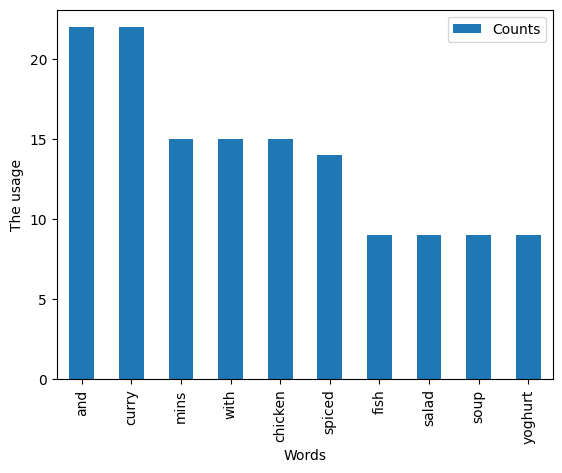

In [36]:
sorted_words.head(10).plot(kind = 'bar')
plt.xlabel("Words")
plt.ylabel("The usage")
plt.show()

Now we will do the same with all the textual data and convert them to vectors

In [37]:
def convert_to_vector(series, character):
  vec = CountVectorizer()
  vect1 = vec.fit(series)

  new_vec = vec.transform(series)
  feature_name = list(range(new_vec.shape[1]))

  for x in range(len(feature_name)):
    feature_name[x] = str(feature_name[x]) + character

  df_ex = pd.DataFrame(new_vec.toarray(),
                       columns = feature_name)

  return df_ex,vec

In [38]:
def dish_vector(series):
  vec = CountVectorizer()
  vect1 = vec.fit(series)

  feature_name = vect1.get_feature_names_out()

  new_vec = vec.transform(series)

  df_ex = pd.DataFrame(new_vec.toarray(), columns = feature_name)

  df_ex.index = series

  return df_ex, vec

In [39]:
df.head()

,Dish Name,Description,Spice,Prep Time,Views,Rating,Number of Votes,Serves,Dietary Info,Cook Time,Ingredients,Instructions
0,Pistachio chicken,Mild chicken in a creamy pistachio sauce,mild,10,11604,4.1,18.0,4.0,['CONTAINS-NUTS'],30.0,"1) 600g chicken thighs, cut into chunks\n2) 10...","1) Boil enough water to cover the pistachios, ..."
1,Tangy Fried Okra,Bhindi with Amchoor,medium,10,49899,4.6,35.0,4.0,['VEGETARIAN'],15.0,1) 500g okra\n2) 3 tbsp mustard oil\n3) 1 onio...,1) Wash and thoroughly dry the okra (kitchen r...
2,Healthy Chicken Korma,Chicken in Creamy Almond Sauce,mild,10,115569,3.6,163.0,4.0,['CONTAINS-NUTS'],20.0,1) 6-8 tbsp natural yoghurt\n2) 1 tsp turmeric...,1) Grind your whole spices in a spice grinder....
3,Brown Lentil Dhal,Sabut Masoor di Dhal,medium,10,146798,3.7,87.0,4.0,['VEGETARIAN'],20.0,1) 200g brown lentils\n2) Approx. 1L of water\n,1) Place the lentils in the pressure cooker wi...
4,Thari Wala Chicken,Healthy Chicken Curry,medium,10,262696,3.5,343.0,4.0,['LACTOSE-FREE'],40.0,1) 8 pieces of chicken (4 legs cut into thigh ...,"1) Skin the chicken, removing any excess fat.\..."


In [40]:
description_vector, desc_vec = convert_to_vector(df['Description'], 'A')
ingredient_vector, ing_vec = convert_to_vector(df['Ingredients'], 'B')
inst_vector, inst_vec= convert_to_vector(df['Instructions'], 'C')

In [41]:
dish_df, dish_vec = dish_vector(df['Dish Name'])

dish_df.head()

,achaari,ajwainy,almonds,aloo,amchoor,and,anda,artichokes,asparagus,athrak,...,vegan,vegetable,vegetables,wala,walee,watermelon,wild,with,zambezi,zhoug
Dish Name,,,,,,,,,,,,,,,,,,,,,
Pistachio chicken,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tangy Fried Okra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Healthy Chicken Korma,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Brown Lentil Dhal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Thari Wala Chicken,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [42]:
description_vector.head()

,0A,1A,2A,3A,4A,5A,6A,7A,8A,9A,...,211A,212A,213A,214A,215A,216A,217A,218A,219A,220A
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
cols_to_act = ['Spice', 'Dietary Info']

for c in cols_to_act:
  le = LabelEncoder()
  df[c] = le.fit_transform(df[c])

In [45]:
df.head()

,Dish Name,Description,Spice,Prep Time,Views,Rating,Number of Votes,Serves,Dietary Info,Cook Time,Ingredients,Instructions
0,Pistachio chicken,Mild chicken in a creamy pistachio sauce,2,10,11604,4.1,18.0,4.0,1,30.0,"1) 600g chicken thighs, cut into chunks\n2) 10...","1) Boil enough water to cover the pistachios, ..."
1,Tangy Fried Okra,Bhindi with Amchoor,1,10,49899,4.6,35.0,4.0,7,15.0,1) 500g okra\n2) 3 tbsp mustard oil\n3) 1 onio...,1) Wash and thoroughly dry the okra (kitchen r...
2,Healthy Chicken Korma,Chicken in Creamy Almond Sauce,2,10,115569,3.6,163.0,4.0,1,20.0,1) 6-8 tbsp natural yoghurt\n2) 1 tsp turmeric...,1) Grind your whole spices in a spice grinder....
3,Brown Lentil Dhal,Sabut Masoor di Dhal,1,10,146798,3.7,87.0,4.0,7,20.0,1) 200g brown lentils\n2) Approx. 1L of water\n,1) Place the lentils in the pressure cooker wi...
4,Thari Wala Chicken,Healthy Chicken Curry,1,10,262696,3.5,343.0,4.0,5,40.0,1) 8 pieces of chicken (4 legs cut into thigh ...,"1) Skin the chicken, removing any excess fat.\..."


In [46]:
num_df = df.drop(['Dish Name', 'Description', 'Ingredients', 'Instructions'], axis=1)

In [47]:
num_df.head()

,Spice,Prep Time,Views,Rating,Number of Votes,Serves,Dietary Info,Cook Time
0,2,10,11604,4.1,18.0,4.0,1,30.0
1,1,10,49899,4.6,35.0,4.0,7,15.0
2,2,10,115569,3.6,163.0,4.0,1,20.0
3,1,10,146798,3.7,87.0,4.0,7,20.0
4,1,10,262696,3.5,343.0,4.0,5,40.0


In [48]:
description_vector.shape

(149, 221)

In [49]:
df_new1 = num_df.join(description_vector)

df_new1.head()

,Spice,Prep Time,Views,Rating,Number of Votes,Serves,Dietary Info,Cook Time,0A,1A,...,211A,212A,213A,214A,215A,216A,217A,218A,219A,220A
0,2,10,11604,4.1,18.0,4.0,1,30.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,10,49899,4.6,35.0,4.0,7,15.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,10,115569,3.6,163.0,4.0,1,20.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,10,146798,3.7,87.0,4.0,7,20.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,10,262696,3.5,343.0,4.0,5,40.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df_new1 = df_new1.join(ingredient_vector)
df_new1 = df_new1.join(inst_vector)

df_new1.head()

,Spice,Prep Time,Views,Rating,Number of Votes,Serves,Dietary Info,Cook Time,0A,1A,...,1273C,1274C,1275C,1276C,1277C,1278C,1279C,1280C,1281C,1282C
0,2,10,11604,4.1,18.0,4.0,1,30.0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,10,49899,4.6,35.0,4.0,7,15.0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,10,115569,3.6,163.0,4.0,1,20.0,0,0,...,0,0,2,0,0,0,1,1,0,0
3,1,10,146798,3.7,87.0,4.0,7,20.0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,10,262696,3.5,343.0,4.0,5,40.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df_new1.index = df['Dish Name']

df_new1.head()

,Spice,Prep Time,Views,Rating,Number of Votes,Serves,Dietary Info,Cook Time,0A,1A,...,1273C,1274C,1275C,1276C,1277C,1278C,1279C,1280C,1281C,1282C
Dish Name,,,,,,,,,,,,,,,,,,,,,
Pistachio chicken,2,10,11604,4.1,18.0,4.0,1,30.0,0,0,...,0,0,1,0,0,0,0,1,0,0
Tangy Fried Okra,1,10,49899,4.6,35.0,4.0,7,15.0,0,0,...,0,0,0,0,0,0,1,0,0,0
Healthy Chicken Korma,2,10,115569,3.6,163.0,4.0,1,20.0,0,0,...,0,0,2,0,0,0,1,1,0,0
Brown Lentil Dhal,1,10,146798,3.7,87.0,4.0,7,20.0,0,0,...,0,0,0,0,0,0,0,1,0,0
Thari Wala Chicken,1,10,262696,3.5,343.0,4.0,5,40.0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we will make a recommendation system

In [52]:
def recommendation(food_item):
  food_vec = dish_vec.transform([food_item]).toarray()

  name_similarities = cosine_similarity(dish_df, food_vec)

  df_name_test = pd.DataFrame(name_similarities, index=df['Dish Name'])
  top_food = df_name_test.sort_values(by = 0, ascending = False).head(1).index[0]

  top_food_vector = df_new1.loc[top_food]

  food_similarities = cosine_similarity(df_new1, np.array([top_food_vector]))

  food_similarities_df = pd.DataFrame(food_similarities, index=df['Dish Name'])
  top_items = list(food_similarities_df.sort_values(by = 0, ascending = False).head(6).index)

  return top_items[1:]

In [58]:
recommendation("Chicken Jalfrezi")

['Caribbean Chicken Curry Stew',
 'Kukul Mass',
 'Jamaican Chicken Curry',
 'Pineapple Curry',
 'Zambezi Baked Sea Bream']